<h1 id='tocheading'>Table of Content</h1>
<div id='toc'></div>

In [34]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Data Cleaning

In [7]:
# frequently used python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from datetime import date

## Order Dataset

In [3]:
order_df = pd.read_csv('olist_orders_dataset.csv')
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null object
order_approved_at                99281 non-null object
order_delivered_carrier_date     97658 non-null object
order_delivered_customer_date    96476 non-null object
order_estimated_delivery_date    99441 non-null object
dtypes: object(8)
memory usage: 6.1+ MB


In [4]:
order_df[order_df.duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [5]:
order_df.drop(['order_status',
               'order_delivered_carrier_date',
               'order_approved_at',
               'order_delivered_customer_date',
               'order_estimated_delivery_date'], axis='columns', inplace=True)

order_df.order_purchase_timestamp = pd.to_datetime(order_df.order_purchase_timestamp).dt.date
#pocipr_df['order_purchase_timestamp'] = pocipr_df['order_purchase_timestamp'].dt.date

In [6]:
order_df.head()

,order_id,customer_id,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13


## Customer Dataset

In [7]:
customer_df = pd.read_csv('olist_customers_dataset.csv')
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
customer_id                 99441 non-null object
customer_unique_id          99441 non-null object
customer_zip_code_prefix    99441 non-null int64
customer_city               99441 non-null object
customer_state              99441 non-null object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [8]:
customer_df[customer_df.duplicated()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


In [9]:
customer_df.drop(['customer_zip_code_prefix', 'customer_city'], axis='columns', inplace=True)

In [10]:
customer_df.nunique()

customer_id           99441
customer_unique_id    96096
customer_state           27
dtype: int64

In [11]:
customer_df.head()

,customer_id,customer_unique_id,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,SP


## Payment Dataset

In [12]:
payment_df = pd.read_csv('olist_order_payments_dataset.csv')
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
order_id                103886 non-null object
payment_sequential      103886 non-null int64
payment_type            103886 non-null object
payment_installments    103886 non-null int64
payment_value           103886 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [13]:
payment_df.drop('payment_sequential', axis='columns', inplace=True)

In [14]:
payment_df[payment_df.duplicated()]

,order_id,payment_type,payment_installments,payment_value
3675,8ca5bdac5ebe8f2d6fc9171d5ebc906a,voucher,1,15.00
4829,59d02be1c50fb6e6930cafd6ff6a31e5,voucher,1,20.00
5091,4689b1816de42507a7d63a4617383c59,voucher,1,56.42
6940,cf101c3abd3c061ca9f78c1bbb1125af,voucher,1,8.46
7441,d744783ed2ace06cac647a9e64dcbcfd,voucher,1,1.47
...,...,...,...,...
102942,dbc097913df341f30b9f9e92f459cee2,voucher,1,50.00
103046,c5fd5386640ddd76adc482b72d24a02b,voucher,1,5.79
103216,4d9190887b47ff1b89c657c788c038f6,voucher,1,12.80
103551,1ea11b975aea60ca92fa0559184d3d34,voucher,1,12.69


In [15]:
payment_df.head()

,order_id,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,credit_card,2,128.45


In [16]:
payment_df.nunique()

order_id                99440
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

## Item Dataset

In [17]:
item_df = pd.read_csv('olist_order_items_dataset.csv')

In [18]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
order_id               112650 non-null object
order_item_id          112650 non-null int64
product_id             112650 non-null object
seller_id              112650 non-null object
shipping_limit_date    112650 non-null object
price                  112650 non-null float64
freight_value          112650 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [19]:
item_df.drop('order_item_id', axis='columns', inplace=True)

In [20]:
item_df[item_df.duplicated()]

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value
14,0008288aa423d2a3f00fcb17cd7d8719,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
33,00143d0f86d6fbd9f9b38ab440ac16f5,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
43,001ab0a7578dd66cd4b0a71f5b6e1e41,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
44,001ab0a7578dd66cd4b0a71f5b6e1e41,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
...,...,...,...,...,...,...
112617,ffecd5a79a0084f6a592288c67e3c298,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,2018-03-05 20:15:27,21.90,15.79
112635,fff8287bbae429a99bb7e8c21d151c41,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14
112641,fffb9224b6fc7c43ebb0904318b10b5f,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19


In [21]:
item_df.drop(['seller_id', 'shipping_limit_date'], axis='columns', inplace=True)
item_df.columns

Index(['order_id', 'product_id', 'price', 'freight_value'], dtype='object')

In [22]:
item_df.head()

,order_id,product_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14


## Product Dataset

In [52]:
product_df = pd.read_csv('olist_products_dataset.csv')

In [53]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
product_id                    32951 non-null object
product_category_name         32341 non-null object
product_name_lenght           32341 non-null float64
product_description_lenght    32341 non-null float64
product_photos_qty            32341 non-null float64
product_weight_g              32949 non-null float64
product_length_cm             32949 non-null float64
product_height_cm             32949 non-null float64
product_width_cm              32949 non-null float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [55]:
product_df.product_category_name.nunique()

73

In [25]:
product_df[product_df.duplicated()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


In [26]:
product_df.fillna(product_df.median(), inplace=True)
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
product_id                    32951 non-null object
product_category_name         32341 non-null object
product_name_lenght           32951 non-null float64
product_description_lenght    32951 non-null float64
product_photos_qty            32951 non-null float64
product_weight_g              32951 non-null float64
product_length_cm             32951 non-null float64
product_height_cm             32951 non-null float64
product_width_cm              32951 non-null float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [27]:
product_df.fillna('other', inplace=True)
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
product_id                    32951 non-null object
product_category_name         32951 non-null object
product_name_lenght           32951 non-null float64
product_description_lenght    32951 non-null float64
product_photos_qty            32951 non-null float64
product_weight_g              32951 non-null float64
product_length_cm             32951 non-null float64
product_height_cm             32951 non-null float64
product_width_cm              32951 non-null float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [28]:
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [29]:
product_df.product_category_name.nunique()

74

## Translation Dataset

In [81]:
translation_df = pd.read_csv('product_category_name_translation.csv')
translation_df.info()
translation_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
product_category_name            71 non-null object
product_category_name_english    71 non-null object
dtypes: object(2)
memory usage: 1.2+ KB


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## Review Dataset

In [31]:
review_df = pd.read_csv('olist_order_reviews_dataset.csv')
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
review_id                  100000 non-null object
order_id                   100000 non-null object
review_score               100000 non-null int64
review_comment_title       11715 non-null object
review_comment_message     41753 non-null object
review_creation_date       100000 non-null object
review_answer_timestamp    100000 non-null object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [32]:
review_df[review_df.duplicated()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp


In [33]:
review_df.drop(['review_id', 'review_creation_date', 'review_answer_timestamp'], axis='columns', inplace=True)
review_df.columns

Index(['order_id', 'review_score', 'review_comment_title',
       'review_comment_message'],
      dtype='object')

In [34]:
for columns in ['review_comment_title', 'review_comment_message']:
    # replace present values with 1
    review_df.loc[review_df[columns].notnull(), columns] = 1
    # replace null values with 0
    review_df.loc[review_df[columns].isna(), columns] = 0
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
order_id                  100000 non-null object
review_score              100000 non-null int64
review_comment_title      100000 non-null int64
review_comment_message    100000 non-null int64
dtypes: int64(3), object(1)
memory usage: 3.1+ MB


In [35]:
review_df.head()

,order_id,review_score,review_comment_title,review_comment_message
0,73fc7af87114b39712e6da79b0a377eb,4,0,0
1,a548910a1c6147796b98fdf73dbeba33,5,0,0
2,f9e4b658b201a9f2ecdecbb34bed034b,5,0,0
3,658677c97b385a9be170737859d3511b,5,0,1
4,8e6bfb81e283fa7e4f11123a3fb894f1,5,0,1


In [36]:
review_df.nunique()

order_id                  99441
review_score                  5
review_comment_title          2
review_comment_message        2
dtype: int64

In [37]:
review_df.review_score.value_counts(normalize=True)

5    0.57420
4    0.19200
1    0.11858
3    0.08287
2    0.03235
Name: review_score, dtype: float64

<BarContainer object of 5 artists>

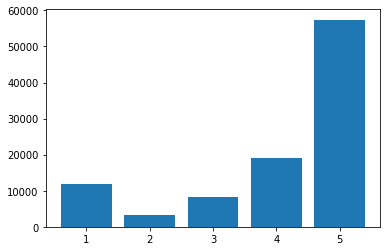

In [38]:
plt.bar(review_df.review_score.value_counts().index, review_df.review_score.value_counts().values)

## Seller Dataset

In [39]:
seller_df = pd.read_csv('olist_sellers_dataset.csv')
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
seller_id                 3095 non-null object
seller_zip_code_prefix    3095 non-null int64
seller_city               3095 non-null object
seller_state              3095 non-null object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [40]:
seller_df.drop(['seller_zip_code_prefix', 'seller_city'], axis='columns', inplace=True)
seller_df.columns

Index(['seller_id', 'seller_state'], dtype='object')

## Dataset Joins

In [41]:
oc_df = pd.merge(order_df, customer_df, how='left', on='customer_id')
oc_df.drop('customer_id', axis='columns', inplace=True)
oc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 4 columns):
order_id                    99441 non-null object
order_purchase_timestamp    99441 non-null object
customer_unique_id          99441 non-null object
customer_state              99441 non-null object
dtypes: object(4)
memory usage: 3.8+ MB


In [42]:
ocp_df = pd.merge(oc_df, payment_df, how='left', on='order_id')
ocp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103887 entries, 0 to 103886
Data columns (total 7 columns):
order_id                    103887 non-null object
order_purchase_timestamp    103887 non-null object
customer_unique_id          103887 non-null object
customer_state              103887 non-null object
payment_type                103886 non-null object
payment_installments        103886 non-null float64
payment_value               103886 non-null float64
dtypes: float64(2), object(5)
memory usage: 6.3+ MB


In [43]:
ocpr_df = pd.merge(ocp_df, review_df, how='left', on='order_id')
ocpr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104486 entries, 0 to 104485
Data columns (total 10 columns):
order_id                    104486 non-null object
order_purchase_timestamp    104486 non-null object
customer_unique_id          104486 non-null object
customer_state              104486 non-null object
payment_type                104485 non-null object
payment_installments        104485 non-null float64
payment_value               104485 non-null float64
review_score                104486 non-null int64
review_comment_title        104486 non-null int64
review_comment_message      104486 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 8.8+ MB


In [44]:
ocpri_df = pd.merge(ocpr_df, item_df, how='left', on='order_id')
#ocpri_df.drop('order_id', axis='columns', inplace=True)
ocpri_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119151 entries, 0 to 119150
Data columns (total 13 columns):
order_id                    119151 non-null object
order_purchase_timestamp    119151 non-null object
customer_unique_id          119151 non-null object
customer_state              119151 non-null object
payment_type                119148 non-null object
payment_installments        119148 non-null float64
payment_value               119148 non-null float64
review_score                119151 non-null int64
review_comment_title        119151 non-null int64
review_comment_message      119151 non-null int64
product_id                  118318 non-null object
price                       118318 non-null float64
freight_value               118318 non-null float64
dtypes: float64(4), int64(3), object(6)
memory usage: 12.7+ MB


In [57]:
ocprip_df = pd.merge(ocpri_df, product_df, how='left', on='product_id')
ocprip_df.drop('product_id', axis='columns', inplace=True)
ocprip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119151 entries, 0 to 119150
Data columns (total 20 columns):
order_id                      119151 non-null object
order_purchase_timestamp      119151 non-null object
customer_unique_id            119151 non-null object
customer_state                119151 non-null object
payment_type                  119148 non-null object
payment_installments          119148 non-null float64
payment_value                 119148 non-null float64
review_score                  119151 non-null int64
review_comment_title          119151 non-null int64
review_comment_message        119151 non-null int64
price                         118318 non-null float64
freight_value                 118318 non-null float64
product_category_name         118318 non-null object
product_name_lenght           118318 non-null float64
product_description_lenght    118318 non-null float64
product_photos_qty            118318 non-null float64
product_weight_g              118318 

In [58]:
ocprip_df.fillna(ocprip_df.median(), inplace=True)

In [59]:
for column in ['payment_type', 'product_category_name']:
    ocprip_df[column].fillna(ocprip_df[column].value_counts().index[0], inplace=True)

In [60]:
ocprip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119151 entries, 0 to 119150
Data columns (total 20 columns):
order_id                      119151 non-null object
order_purchase_timestamp      119151 non-null object
customer_unique_id            119151 non-null object
customer_state                119151 non-null object
payment_type                  119151 non-null object
payment_installments          119151 non-null float64
payment_value                 119151 non-null float64
review_score                  119151 non-null int64
review_comment_title          119151 non-null int64
review_comment_message        119151 non-null int64
price                         119151 non-null float64
freight_value                 119151 non-null float64
product_category_name         119151 non-null object
product_name_lenght           119151 non-null float64
product_description_lenght    119151 non-null float64
product_photos_qty            119151 non-null float64
product_weight_g              119151 

In [50]:
ocpript_df = pd.merge(ocprip_df, translation_df, how='left', on='product_id')
ocpript_df.drop('product_category_name', axis='columns', inplace=True)
ocprip_df.info()

NameError: name 'ocprip_df' is not defined

In [62]:
df = ocprip_df.groupby('customer_unique_id').agg({'order_id': 'count',
                                                  'payment_value': 'sum',
                                                  'payment_installments': 'mean',
                                                  'review_score': 'mean',
                                                  'price': 'mean',
                                                  'freight_value': 'mean',
                                                  'product_name_lenght': 'mean',
                                                  'product_description_lenght': 'mean',
                                                  'product_photos_qty': 'mean',
                                                  'product_length_cm': 'mean',
                                                  'product_height_cm': 'mean',
                                                  'product_width_cm': 'mean',
                                                  'review_comment_title': 'mean',
                                                  'review_comment_message': 'mean',
                                                  'payment_type': lambda x: x.value_counts().index[0],
                                                  'product_category_name': lambda x: x.value_counts().index[0],
                                                  'customer_state': lambda x: x.value_counts().index[0],
                                                  'order_purchase_timestamp': lambda x: min((max(ocprip_df.order_purchase_timestamp)-x).dt.days)})
df

,order_id,payment_value,payment_installments,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_length_cm,product_height_cm,product_width_cm,review_comment_title,review_comment_message,payment_type,product_category_name,customer_state,order_purchase_timestamp
customer_unique_id,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,8.0,5.0,129.90,12.00,60.0,236.0,1.0,34.0,7.0,32.0,1.0,1.0,credit_card,cama_mesa_banho,SP,160
0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,1.0,4.0,18.90,8.29,56.0,635.0,1.0,26.0,11.0,18.0,0.0,0.0,credit_card,beleza_saude,SP,163
0000f46a3911fa3c0805444483337064,1,86.22,8.0,3.0,69.00,17.22,49.0,177.0,3.0,25.0,50.0,35.0,0.0,0.0,credit_card,papelaria,SC,586
0000f6ccb0745a6a4b88665a16c9f078,1,43.62,4.0,4.0,25.99,17.63,43.0,1741.0,5.0,19.0,5.0,11.0,0.0,1.0,credit_card,telefonia,PA,370
0004aac84e0df4da2b147fca70cf8255,1,196.89,6.0,5.0,180.00,16.89,58.0,794.0,3.0,16.0,3.0,11.0,0.0,0.0,credit_card,telefonia,SP,337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2,4134.84,10.0,5.0,785.00,248.71,54.0,478.5,1.0,55.0,75.0,61.0,0.0,0.0,credit_card,beleza_saude,PE,496
fffea47cd6d3cc0a88bd621562a9d061,1,84.58,1.0,4.0,64.89,19.69,37.0,506.0,2.0,33.0,36.0,27.0,0.0,0.0,credit_card,bebes,BA,311
ffff371b4d645b6ecea244b27531430a,1,112.46,1.0,5.0,89.90,22.56,57.0,716.0,5.0,17.0,15.0,13.0,0.0,0.0,credit_card,automotivo,MT,617


In [75]:
# df.to_csv('df.csv', index=True);
cust_ocprip_df = pd.read_csv('df.csv', index_col=0)
cust_ocprip_df

,order_id,payment_value,payment_installments,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_length_cm,product_height_cm,product_width_cm,review_comment_title,review_comment_message,payment_type,product_category_name,customer_state,order_purchase_timestamp
customer_unique_id,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,8.0,5.0,129.90,12.00,60.0,236.0,1.0,34.0,7.0,32.0,1.0,1.0,credit_card,cama_mesa_banho,SP,160
0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,1.0,4.0,18.90,8.29,56.0,635.0,1.0,26.0,11.0,18.0,0.0,0.0,credit_card,beleza_saude,SP,163
0000f46a3911fa3c0805444483337064,1,86.22,8.0,3.0,69.00,17.22,49.0,177.0,3.0,25.0,50.0,35.0,0.0,0.0,credit_card,papelaria,SC,586
0000f6ccb0745a6a4b88665a16c9f078,1,43.62,4.0,4.0,25.99,17.63,43.0,1741.0,5.0,19.0,5.0,11.0,0.0,1.0,credit_card,telefonia,PA,370
0004aac84e0df4da2b147fca70cf8255,1,196.89,6.0,5.0,180.00,16.89,58.0,794.0,3.0,16.0,3.0,11.0,0.0,0.0,credit_card,telefonia,SP,337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2,4134.84,10.0,5.0,785.00,248.71,54.0,478.5,1.0,55.0,75.0,61.0,0.0,0.0,credit_card,beleza_saude,PE,496
fffea47cd6d3cc0a88bd621562a9d061,1,84.58,1.0,4.0,64.89,19.69,37.0,506.0,2.0,33.0,36.0,27.0,0.0,0.0,credit_card,bebes,BA,311
ffff371b4d645b6ecea244b27531430a,1,112.46,1.0,5.0,89.90,22.56,57.0,716.0,5.0,17.0,15.0,13.0,0.0,0.0,credit_card,automotivo,MT,617


In [76]:
df = pd.get_dummies(cust_ocprip_df)
df

,order_id,payment_value,payment_installments,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_length_cm,...,customer_state_PR,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,8.0,5.0,129.90,12.00,60.0,236.0,1.0,34.0,...,0,0,0,0,0,0,0,0,1,0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,1.0,4.0,18.90,8.29,56.0,635.0,1.0,26.0,...,0,0,0,0,0,0,0,0,1,0
0000f46a3911fa3c0805444483337064,1,86.22,8.0,3.0,69.00,17.22,49.0,177.0,3.0,25.0,...,0,0,0,0,0,0,1,0,0,0
0000f6ccb0745a6a4b88665a16c9f078,1,43.62,4.0,4.0,25.99,17.63,43.0,1741.0,5.0,19.0,...,0,0,0,0,0,0,0,0,0,0
0004aac84e0df4da2b147fca70cf8255,1,196.89,6.0,5.0,180.00,16.89,58.0,794.0,3.0,16.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2,4134.84,10.0,5.0,785.00,248.71,54.0,478.5,1.0,55.0,...,0,0,0,0,0,0,0,0,0,0
fffea47cd6d3cc0a88bd621562a9d061,1,84.58,1.0,4.0,64.89,19.69,37.0,506.0,2.0,33.0,...,0,0,0,0,0,0,0,0,0,0
ffff371b4d645b6ecea244b27531430a,1,112.46,1.0,5.0,89.90,22.56,57.0,716.0,5.0,17.0,...,0,0,0,0,0,0,0,0,0,0


# Exploratory Data Analytics

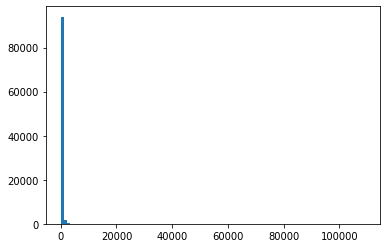

In [79]:
plt.hist(cust_ocprip_df.payment_value, bins=100);

In [87]:
cust_ocprip_df.payment_installments.value_counts()

1.000000    46466
2.000000    11825
3.000000     9858
4.000000     6695
5.000000     4887
            ...  
5.363636        1
4.571429        1
1.142857        1
4.250000        1
1.114286        1
Name: payment_installments, Length: 128, dtype: int64

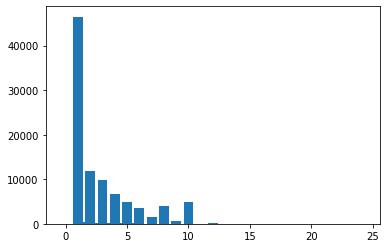

In [90]:
plt.bar(cust_ocprip_df.payment_installments.value_counts().index, cust_ocprip_df.payment_installments.value_counts().values);

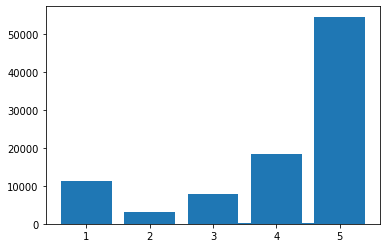

In [91]:
plt.bar(cust_ocprip_df.review_score.value_counts().index, cust_ocprip_df.review_score.value_counts().values);

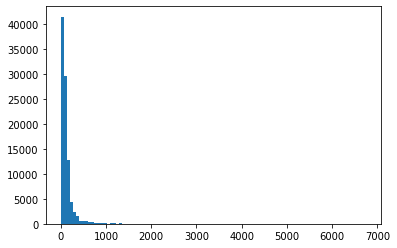

In [95]:
plt.hist(cust_ocprip_df.price, bins=100);

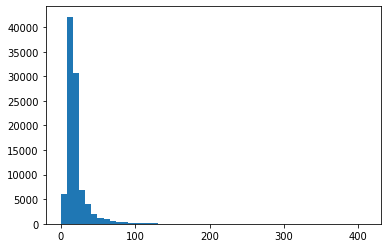

In [98]:
plt.hist(cust_ocprip_df.freight_value, bins=50);

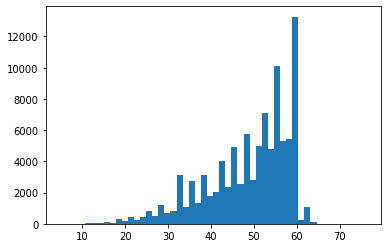

In [97]:
plt.hist(cust_ocprip_df.product_name_lenght, bins=50);

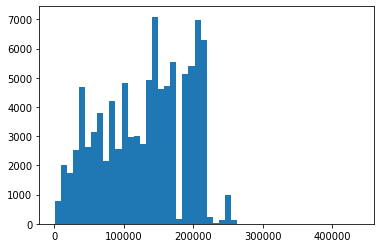

In [127]:
plt.hist(np.power(cust_ocprip_df.product_name_lenght, 3), bins=50);

In [118]:
cust_ocprip_df.product_name_lenght.sort_values()

customer_unique_id
ce035dc4c675ac090c8a0ea03097d1f0     5.0
eec90aa06e8887c2a5937f17d0d03d4e     5.0
69b7eeb81420bf2537b4e408c6bfe219     5.0
c9a4d3ed04279264e926a98f98502fe6     5.0
88d6f82c6e7cfdc3313f53a6836f3138     5.0
                                    ... 
2f3c23d155ce288b4f27feabf58f8b03    72.0
ac6b61f2d1d53bbe79898f3b9b522d09    72.0
16a80e00832b1f2f7dbdb8073f8e2ed1    72.0
1772de5c8b22d6970d4d4c91277a7796    72.0
f7c5756a1a6307abaf212591d0d037b0    76.0
Name: product_name_lenght, Length: 96096, dtype: float64

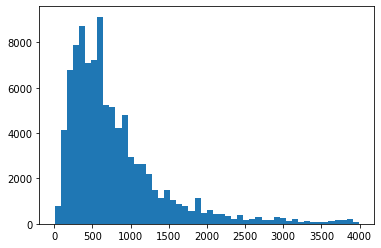

In [99]:
plt.hist(cust_ocprip_df.product_description_lenght, bins=50);

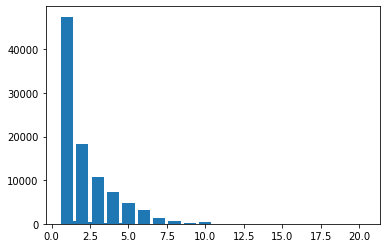

In [101]:
plt.bar(cust_ocprip_df.product_photos_qty.value_counts().index, cust_ocprip_df.product_photos_qty.value_counts().values);

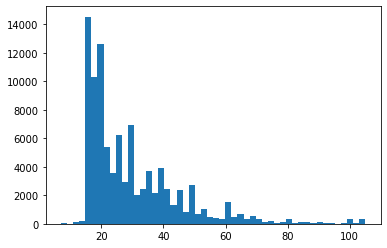

In [102]:
plt.hist(cust_ocprip_df.product_length_cm, bins=50);

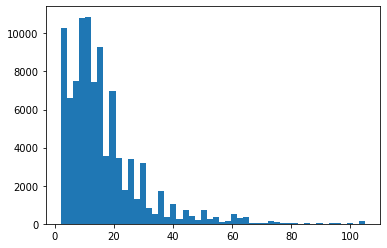

In [105]:
plt.hist(cust_ocprip_df.product_height_cm, bins=50);

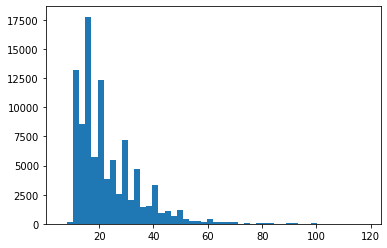

In [106]:
plt.hist(cust_ocprip_df.product_width_cm, bins=50);

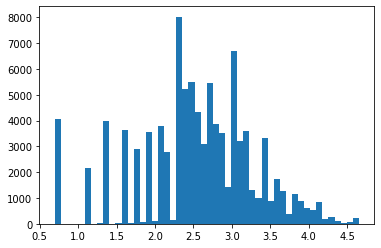

In [109]:
plt.hist(np.log(cust_ocprip_df.product_width_cm), bins=50);

# K-means Clustering

In [129]:
skewed_features = ['payment_value', 'payment_installments', 'price', 'freight_value', 'product_description_lenght', 
                   'product_photos_qty', 'product_length_cm', 'product_height_cm', 'product_width_cm']
log_cust_ocprip_df = cust_ocprip_df
log_cust_ocprip_df[skewed_features] = np.log(cust_ocprip_df[skewed_features])

In [131]:
df = pd.get_dummies(log_cust_ocprip_df)
df

,order_id,payment_value,payment_installments,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_length_cm,...,customer_state_PR,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,4.955123,2.079442,5.0,4.866765,2.484907,60.0,5.463832,0.000000,3.526361,...,0,0,0,0,0,0,0,0,1,0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,3.302849,0.000000,4.0,2.939162,2.115050,56.0,6.453625,0.000000,3.258097,...,0,0,0,0,0,0,0,0,1,0
0000f46a3911fa3c0805444483337064,1,4.456902,2.079442,3.0,4.234107,2.846071,49.0,5.176150,1.098612,3.218876,...,0,0,0,0,0,0,1,0,0,0
0000f6ccb0745a6a4b88665a16c9f078,1,3.775516,1.386294,4.0,3.257712,2.869602,43.0,7.462215,1.609438,2.944439,...,0,0,0,0,0,0,0,0,0,0
0004aac84e0df4da2b147fca70cf8255,1,5.282645,1.791759,5.0,5.192957,2.826722,58.0,6.677083,1.098612,2.772589,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2,8.327204,2.302585,5.0,6.665684,5.516288,54.0,6.170656,0.000000,4.007333,...,0,0,0,0,0,0,0,0,0,0
fffea47cd6d3cc0a88bd621562a9d061,1,4.437698,0.000000,4.0,4.172694,2.980111,37.0,6.226537,0.693147,3.496508,...,0,0,0,0,0,0,0,0,0,0
ffff371b4d645b6ecea244b27531430a,1,4.722598,0.000000,5.0,4.498698,3.116178,57.0,6.573680,1.609438,2.833213,...,0,0,0,0,0,0,0,0,0,0


In [137]:
df.isna().sum()

order_id                0
payment_value           0
payment_installments    0
review_score            0
price                   0
                       ..
customer_state_RS       0
customer_state_SC       0
customer_state_SE       0
customer_state_SP       0
customer_state_TO       0
Length: 121, dtype: int64

## Standard Scaler

In [133]:
df = df.sample(frac=0.1)

In [134]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df)
print('Mean:', scaler.mean_)
print('Std:', np.sqrt(scaler.var_))

ValueError: Input contains infinity or a value too large for dtype('float64').

In [132]:
df.shape

(96096, 121)

# K-means Clustering

## Standard Scaler

In [38]:
df = df.sample(frac=0.1)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df)
print('Mean:', scaler.mean_)
print('Std:', np.sqrt(scaler.var_))

Mean: [1.23038502e+00 2.13625923e+02 2.91337569e+00 4.07449129e+00
 1.27455007e+02 2.02440125e+01 4.88993633e+01 8.01705066e+02
 2.27304458e+00 3.02402654e+01 1.65097734e+01 2.28969678e+01
 1.15682738e-01 4.17912370e-01 2.87679501e+02 1.96670135e-01
 7.69510926e-01 1.58168574e-02 0.00000000e+00 1.80020812e-02
 2.08116545e-03 3.32986472e-03 2.60145682e-03 2.70551509e-03
 2.08116545e-04 2.08116545e-04 1.14464100e-03 4.37044745e-03
 4.02705515e-02 2.87200832e-02 3.53798127e-03 8.77211238e-02
 3.54838710e-02 1.01040583e-01 4.05827263e-03 0.00000000e+00
 5.61914672e-03 1.04058273e-04 6.24349636e-04 2.91363163e-03
 9.78147763e-03 6.76378772e-03 1.14464100e-03 2.28928200e-03
 1.45681582e-03 1.76899063e-03 3.62122789e-02 5.20291363e-04
 5.72320499e-03 2.18522373e-03 2.55983351e-02 6.65972945e-03
 7.90842872e-02 1.97710718e-02 1.56087409e-03 4.16233091e-04
 4.16233091e-04 0.00000000e+00 1.14464100e-03 8.32466181e-04
 3.57960458e-02 2.08116545e-04 3.12174818e-04 1.66493236e-03
 6.42039542e-02 7.

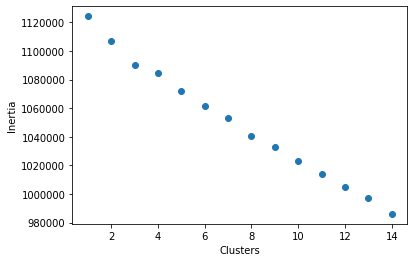

In [40]:
from sklearn.cluster import KMeans
inertia_dict = {}
for k in range(1,15):
    km = KMeans(n_clusters=k).fit(X)
    inertia_dict[k] = km.inertia_
    
plt.scatter(inertia_dict.keys(), inertia_dict.values())
plt.xlabel('Clusters')
plt.ylabel('Inertia');

## Elbow Diagram

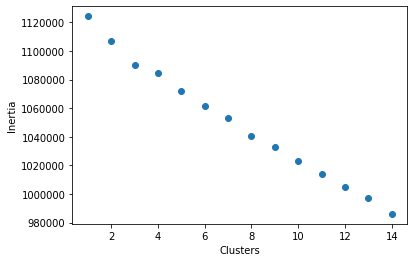

In [40]:
from sklearn.cluster import KMeans
inertia_dict = {}
for k in range(1,15):
    km = KMeans(n_clusters=k).fit(X)
    inertia_dict[k] = km.inertia_
    
plt.scatter(inertia_dict.keys(), inertia_dict.values())
plt.xlabel('Clusters')
plt.ylabel('Inertia');

Text(0, 0.5, 'Proportion of Variance Explained')

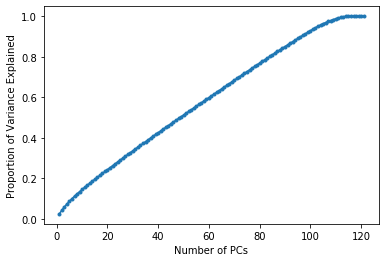

In [41]:
# principle component analysis
from sklearn.decomposition import PCA
n_components = 121
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

plt.plot(range(1,n_components+1), pca.explained_variance_ratio_.cumsum(),marker='.');
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')

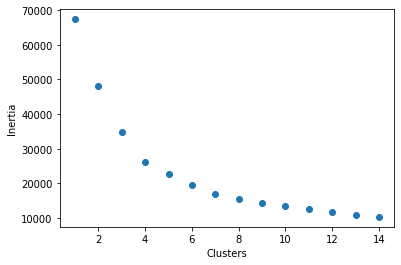

In [42]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
inertia_dict = {}
for k in range(1,15):
    km = KMeans(n_clusters=k).fit(X_pca)
    inertia_dict[k] = km.inertia_
    
plt.scatter(inertia_dict.keys(), inertia_dict.values())
plt.xlabel('Clusters')
plt.ylabel('Inertia');

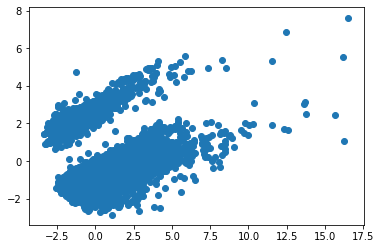

In [43]:
plt.scatter(X_pca[:,0],X_pca[:,1])

## K-means Clusters

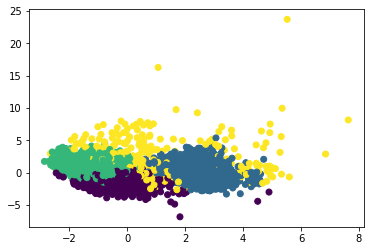

In [44]:
km = KMeans(n_clusters=4).fit(X_pca)
plt.scatter(X_pca[:,1], X_pca[:,2], c=km.labels_)

In [45]:
np.bincount(km.labels_)

array([2852, 2155, 4126,  477], dtype=int64)

In [46]:
km.cluster_centers_

array([[ 1.01203949, -0.40051431, -1.20591141],
       [-1.13482941,  2.33145784,  0.25440853],
       [-0.6484412 , -1.02714082,  0.50970472],
       [ 4.68488285,  0.74624355,  1.65192303]])

In [47]:
from scipy import stats
corr_array=[]
for i in range(df.shape[1]-1):  
    corr_array.append([df.columns[i],
                       np.abs(stats.pearsonr(df[df.columns[i]], X_pca[:,2])[0]),
                       stats.pearsonr(df[df.columns[i]], X_pca[:,2])[0],
                       stats.pearsonr(df[df.columns[i]], X_pca[:,2])[1]])
    
corr_df = pd.DataFrame(corr_array, columns = ['feature', 'abs_corr', 'corr', 'p_value'])
corr_df.sort_values(by='abs_corr', ascending=False, inplace=True)
corr_df.reset_index(drop=True, inplace=True)
corr_df

,feature,abs_corr,corr,p_value
0,product_width_cm,0.449837,-0.449837,0.000000e+00
1,price,0.448949,0.448949,0.000000e+00
2,product_length_cm,0.419159,-0.419159,0.000000e+00
3,payment_value,0.414362,0.414362,0.000000e+00
4,product_description_lenght,0.359471,0.359471,4.744925e-291
...,...,...,...,...
115,product_category_name_artigos_de_festas,0.000003,-0.000003,9.998032e-01
116,payment_type_not_defined,NaN,NaN,NaN
117,product_category_name_casa_conforto_2,NaN,NaN,NaN
118,product_category_name_fashion_roupa_infanto_ju...,NaN,NaN,NaN


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.709e+31
Date:                Fri, 20 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:21:22   Log-Likelihood:             3.1032e+05
No. Observations:                9610   AIC:                        -6.204e+05
Df Residuals:                    9495   BIC:                        -6.196e+05
Df Model:                         114                                         
Covariance Type:            nonrobust                                         
========================================================================================================================================
                                                                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------
const                                                                 3.656e-16   2.35e-17     15.563      0.000     3.2e-16    4.12e-16
order_id                                                                 0.0467   2.93e-17   1.59e+15      0.000       0.047       0.047
payment_value                                                            0.2436   3.21e-17    7.6e+15      0.000       0.244       0.244
payment_installments                                                     0.3065   2.79e-17    1.1e+16      0.000       0.307       0.307
review_score                                                            -0.0524   2.49e-17   -2.1e+15      0.000      -0.052      -0.052
price                                                                    0.3467   3.33e-17   1.04e+16      0.000       0.347       0.347
freight_value                                                            0.3950   3.22e-17   1.23e+16      0.000       0.395       0.395
product_name_lenght                                                      0.0434   2.48e-17   1.75e+15      0.000       0.043       0.043
product_description_lenght                                               0.0737   2.65e-17   2.78e+15      0.000       0.074       0.074
product_photos_qty                                                       0.0251   2.57e-17   9.79e+14      0.000       0.025       0.025
product_length_cm                                                        0.3323   3.09e-17   1.07e+16      0.000       0.332       0.332
product_height_cm                                                        0.3258   2.98e-17   1.09e+16      0.000       0.326       0.326
product_width_cm                                                         0.3658   3.22e-17   1.14e+16      0.000       0.366       0.366
review_comment_title                                                     0.0308   2.78e-17   1.11e+15      0.000       0.031       0.031
review_comment_message                                                   0.0500   2.66e-17   1.88e+15      0.000       0.050       0.050
order_purchase_timestamp                                                 0.0148   2.69e-17   5.52e+14      0.000       0.015       0.015
payment_type_boleto                                                     -0.1632   1.48e-17   -1.1e+16      0.000      -0.163      -0.163
payment_type_credit_card                                                 0.1813   1.34e-17   1.35e+16      0.000       0.181       0.181
payment_type_debit_card                                                 -0.0412   2.28e-17   -1.8e+15      0.000      -0.041      -0.041
payment_type_not_defined                                             

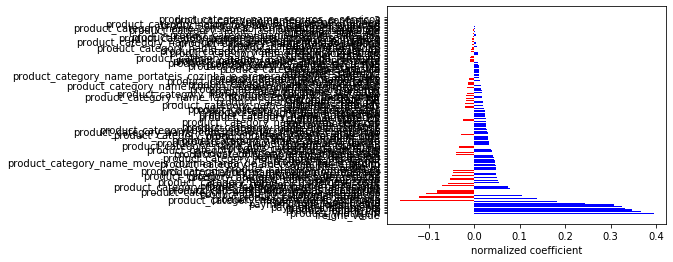

In [57]:
for i in [0]:
    X=df
    y=X_pca[:,i]

    # scale data with standard scaler
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X = pd.DataFrame(data=scaler.fit_transform(X), columns=X.columns)

    # fit logit function 
    import statsmodels.api as sm
    X_withconstant = sm.add_constant(X)
    logit = sm.OLS(y, X_withconstant).fit()
    display(logit.summary()) 

    # table of significant coefficinets sorted by absolute value
    coef_table = logit.summary().tables[1]
    coef_df = pd.DataFrame(data=coef_table.data[1:], columns=coef_table.data[0])
    coef_df['coef'] = coef_df['coef'].astype(float)
    coef_df['P>|t|'] = coef_df['P>|t|'].astype(float)
    coef_df['abs_coef'] = np.abs(coef_df['coef'])
    coef_df.drop(0, axis='index', inplace=True)
    coefs_by_mag = coef_df.sort_values(by='abs_coef', ascending=False)
    coefs_by_mag = coefs_by_mag[coefs_by_mag['P>|t|'] <= 0.05]



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.709e+31
Date:                Fri, 20 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:39:39   Log-Likelihood:             3.1032e+05
No. Observations:                9610   AIC:                        -6.204e+05
Df Residuals:                    9495   BIC:                        -6.196e+05
Df Model:                         114                                         
Covariance Type:            nonrobust                                         
========================================================================================================================================
                                                                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------
const                                                                 3.656e-16   2.35e-17     15.563      0.000     3.2e-16    4.12e-16
order_id                                                                 0.0467   2.93e-17   1.59e+15      0.000       0.047       0.047
payment_value                                                            0.2436   3.21e-17    7.6e+15      0.000       0.244       0.244
payment_installments                                                     0.3065   2.79e-17    1.1e+16      0.000       0.307       0.307
review_score                                                            -0.0524   2.49e-17   -2.1e+15      0.000      -0.052      -0.052
price                                                                    0.3467   3.33e-17   1.04e+16      0.000       0.347       0.347
freight_value                                                            0.3950   3.22e-17   1.23e+16      0.000       0.395       0.395
product_name_lenght                                                      0.0434   2.48e-17   1.75e+15      0.000       0.043       0.043
product_description_lenght                                               0.0737   2.65e-17   2.78e+15      0.000       0.074       0.074
product_photos_qty                                                       0.0251   2.57e-17   9.79e+14      0.000       0.025       0.025
product_length_cm                                                        0.3323   3.09e-17   1.07e+16      0.000       0.332       0.332
product_height_cm                                                        0.3258   2.98e-17   1.09e+16      0.000       0.326       0.326
product_width_cm                                                         0.3658   3.22e-17   1.14e+16      0.000       0.366       0.366
review_comment_title                                                     0.0308   2.78e-17   1.11e+15      0.000       0.031       0.031
review_comment_message                                                   0.0500   2.66e-17   1.88e+15      0.000       0.050       0.050
order_purchase_timestamp                                                 0.0148   2.69e-17   5.52e+14      0.000       0.015       0.015
payment_type_boleto                                                     -0.1632   1.48e-17   -1.1e+16      0.000      -0.163      -0.163
payment_type_credit_card                                                 0.1813   1.34e-17   1.35e+16      0.000       0.181       0.181
payment_type_debit_card                                                 -0.0412   2.28e-17   -1.8e+15      0.000      -0.041      -0.041
payment_type_not_defined                                             

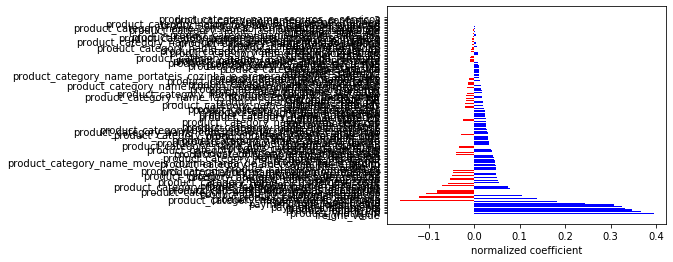

In [64]:
for i in range(3):
    X=df
    y=X_pca[:,i]

    # scale data with standard scaler
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X = pd.DataFrame(data=scaler.fit_transform(X), columns=X.columns)

    # fit logit function 
    import statsmodels.api as sm
    X_withconstant = sm.add_constant(X)
    logit = sm.OLS(y, X_withconstant).fit()
    #display(logit.summary()) 

    # table of significant coefficinets sorted by absolute value
    coef_table = logit.summary().tables[1]
    coef_df = pd.DataFrame(data=coef_table.data[1:], columns=coef_table.data[0])
    coef_df['coef'] = coef_df['coef'].astype(float)
    coef_df['P>|t|'] = coef_df['P>|t|'].astype(float)
    coef_df['abs_coef'] = np.abs(coef_df['coef'])
    coef_df.drop(0, axis='index', inplace=True)
    coefs_by_mag = coef_df.sort_values(by='abs_coef', ascending=False)
    coefs_by_mag = coefs_by_mag[coefs_by_mag['P>|t|'] <= 0.05]

    # bar chart of feature coefficients
    bar_names = coefs_by_mag['']
    bar_heights = coefs_by_mag['coef']
    bar_colors = np.where(bar_heights>0, 'blue', 'red')
    plt.figure(figsize=(5.0, 4.0))
    plt.barh(bar_names, bar_heights, color=bar_colors)
    plt.xlabel('normalized coefficient')

In [59]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

Text(0, 0.5, 'TSNE 2')

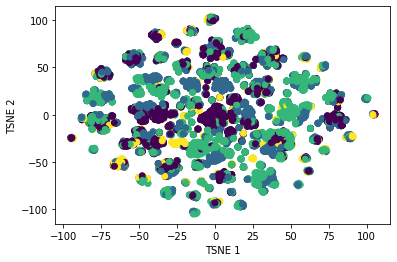

In [61]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=km.labels_)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     480.7
Date:                Fri, 20 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:40:26   Log-Likelihood:                -40572.
No. Observations:                9610   AIC:                         8.137e+04
Df Residuals:                    9495   BIC:                         8.220e+04
Df Model:                         114                                         
Covariance Type:            nonrobust                                         
========================================================================================================================================
                                                                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------
const                                                                   -0.3392      0.169     -2.004      0.045      -0.671      -0.007
order_id                                                                -0.0023      0.211     -0.011      0.991      -0.416       0.411
payment_value                                                           -0.1483      0.231     -0.642      0.521      -0.601       0.305
payment_installments                                                    -0.1494      0.201     -0.744      0.457      -0.543       0.244
review_score                                                            -0.1211      0.179     -0.675      0.500      -0.473       0.230
price                                                                   -0.4244      0.240     -1.771      0.077      -0.894       0.045
freight_value                                                            0.3457      0.232      1.491      0.136      -0.109       0.800
product_name_lenght                                                     -0.0624      0.179     -0.349      0.727      -0.413       0.288
product_description_lenght                                               0.2500      0.191      1.310      0.190      -0.124       0.624
product_photos_qty                                                      -0.0246      0.185     -0.133      0.894      -0.387       0.338
product_length_cm                                                       -0.2528      0.223     -1.135      0.256      -0.690       0.184
product_height_cm                                                       -0.0682      0.215     -0.317      0.751      -0.490       0.353
product_width_cm                                                         0.4845      0.232      2.091      0.037       0.030       0.939
review_comment_title                                                     0.3916      0.200      1.957      0.050      -0.001       0.784
review_comment_message                                                   0.3189      0.191      1.666      0.096      -0.056       0.694
order_purchase_timestamp                                                 0.1742      0.194      0.900      0.368      -0.205       0.554
payment_type_boleto                                                      0.4256      0.107      3.994      0.000       0.217       0.634
payment_type_credit_card                                                -0.2352      0.097     -2.430      0.015      -0.425      -0.045
payment_type_debit_card                                                 -0.9689      0.165     -5.888      0.000      -1.291      -0.646
payment_type_not_defined                                             

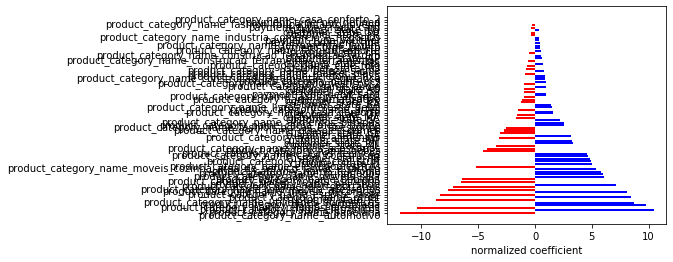

In [66]:
for i in [0]:
    X=df
    y=X_tsne[:,i]

    # scale data with standard scaler
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X = pd.DataFrame(data=scaler.fit_transform(X), columns=X.columns)

    # fit logit function 
    import statsmodels.api as sm
    X_withconstant = sm.add_constant(X)
    logit = sm.OLS(y, X_withconstant).fit()
    display(logit.summary()) 

    # table of significant coefficinets sorted by absolute value
    coef_table = logit.summary().tables[1]
    coef_df = pd.DataFrame(data=coef_table.data[1:], columns=coef_table.data[0])
    coef_df['coef'] = coef_df['coef'].astype(float)
    coef_df['P>|t|'] = coef_df['P>|t|'].astype(float)
    coef_df['abs_coef'] = np.abs(coef_df['coef'])
    coef_df.drop(0, axis='index', inplace=True)
    coefs_by_mag = coef_df.sort_values(by='abs_coef', ascending=False)
    coefs_by_mag = coefs_by_mag[coefs_by_mag['P>|t|'] <= 0.05]

    # bar chart of feature coefficients
    bar_names = coefs_by_mag['']
    bar_heights = coefs_by_mag['coef']
    bar_colors = np.where(bar_heights>0, 'blue', 'red')
    plt.figure(figsize=(5.0, 4.0))
    plt.barh(bar_names, bar_heights, color=bar_colors)
    plt.xlabel('normalized coefficient')

Text(0.5, 0, 'normalized coefficient')

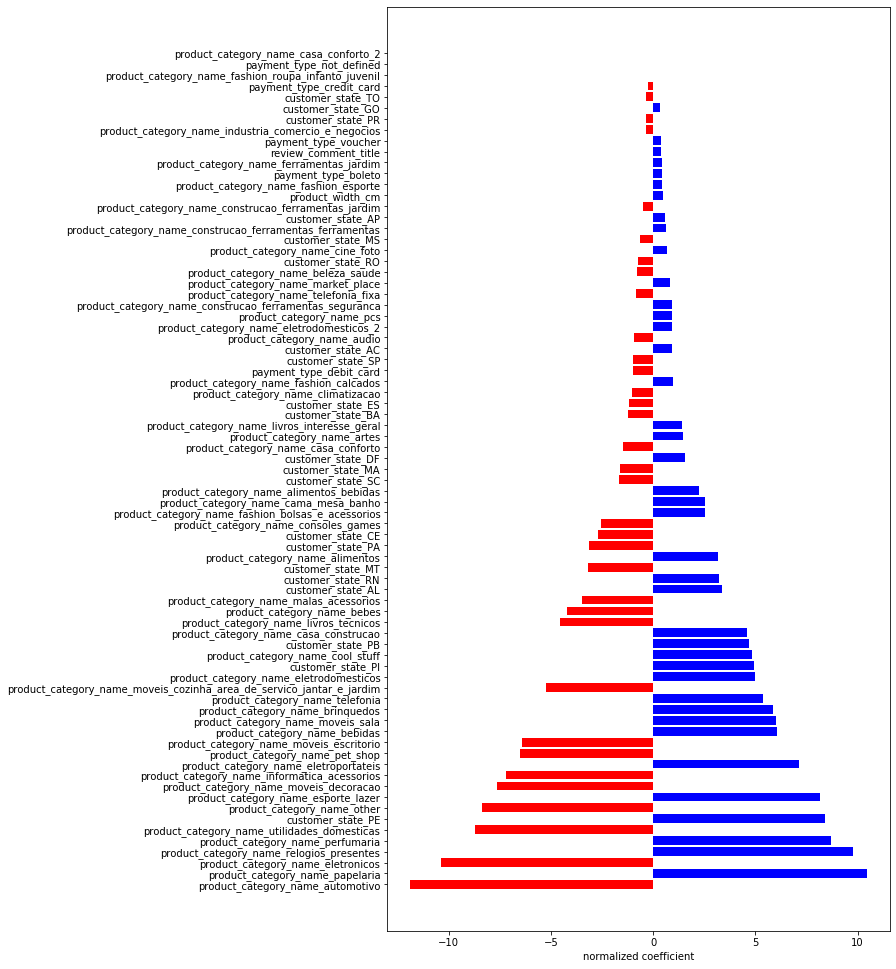

In [74]:
    # bar chart of feature coefficients
    bar_names = coefs_by_mag['']
    bar_heights = coefs_by_mag['coef']
    bar_colors = np.where(bar_heights>0, 'blue', 'red')
    plt.figure(figsize=(9,17))
    plt.barh(bar_names, bar_heights, color=bar_colors)
    plt.xlabel('normalized coefficient')